# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [134]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [135]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_BikeSharingDemand/main/bike-sharing-demand/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [136]:
print('實驗資料大小:',df_train.shape)

實驗資料大小: (10886, 12)


In [137]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_train.info()

#初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# 2.數據清洗

In [138]:
# 因為casual(非註冊用戶租賃數量) + registered(註冊用戶租賃數量)	+ count(總租賃數量)
# 所以casual和registered可以直接刪除

df_train = df_train.drop(['casual','registered'],axis=1)

df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


# 3.特徵工程

In [139]:
# 把年月日時提取出來成為特徵

# 用.to_datetime將datetime(日期時間)欄位轉換為日期時間類型
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

# 插入年月日時
# .insert(插入位置，插入欄位名稱，插入值)
df_train.insert(1, 'year', df_train['datetime'].dt.year)
df_train.insert(2, 'month', df_train['datetime'].dt.month)
df_train.insert(3, 'day', df_train['datetime'].dt.day)
df_train.insert(4, 'hour', df_train['datetime'].dt.hour)


# 顯示結果
df_train.head()

,datetime,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,2011,1,1,3,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,2011,1,1,4,1,0,0,1,9.84,14.395,75,0.0,1


In [140]:
# 把星期幾也提取出來成為特徵

df_train.insert(5, 'week', df_train['datetime'].dt.weekday)

# 顯示結果
df_train.head()

,datetime,year,month,day,hour,week,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,2011,1,1,0,5,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,2011,1,1,2,5,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,2011,1,1,3,5,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,2011,1,1,4,5,1,0,0,1,9.84,14.395,75,0.0,1


In [141]:
# datetime已經被拆分了，所以他就可以刪了(另一方面時間的格式會在有些訓練模型上出現錯誤)
df_train = df_train.drop(['datetime'],axis=1)

df_train

,year,month,day,hour,week,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,5,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011,1,1,2,5,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011,1,1,3,5,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011,1,1,4,5,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,2,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012,12,19,20,2,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012,12,19,21,2,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012,12,19,22,2,4,0,1,1,13.94,17.425,61,6.0032,129


# 4.相關性分析

In [142]:
# 查看各特徵與標籤的相關性
# 創建一個相關性的DataFrame
corrDf = pd.DataFrame()

# corrDf=df_train.corr()['count']中的相關性的絕對值大於0.5
corrDf = df_train.corr()['count'][abs(df_train.corr()['count']) > 0.1]

corrDf

,count
year,0.260403
month,0.166862
hour,0.400601
season,0.163439
weather,-0.128655
temp,0.394454
atemp,0.389784
humidity,-0.317371
windspeed,0.101369
count,1.000000


In [143]:
# 提取高相關性的特徵
train_Sel = df_train[corrDf.index]

# 查看有哪些特徵行，並存起來
# 因為這裡資料較多，所以相關性分析可信度較高(之後測試集直接從這裡拿取高相關性的特徵行)
train_Sel_columns = train_Sel.columns

# 顯示提取的dataframe
train_Sel

,year,month,hour,season,weather,temp,atemp,humidity,windspeed,count
0,2011,1,0,1,1,9.84,14.395,81,0.0000,16
1,2011,1,1,1,1,9.02,13.635,80,0.0000,40
2,2011,1,2,1,1,9.02,13.635,80,0.0000,32
3,2011,1,3,1,1,9.84,14.395,75,0.0000,13
4,2011,1,4,1,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,4,1,15.58,19.695,50,26.0027,336
10882,2012,12,20,4,1,14.76,17.425,57,15.0013,241
10883,2012,12,21,4,1,13.94,15.910,61,15.0013,168
10884,2012,12,22,4,1,13.94,17.425,61,6.0032,129


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'year'),
  Text(0, 1.5, 'month'),
  Text(0, 2.5, 'hour'),
  Text(0, 3.5, 'season'),
  Text(0, 4.5, 'weather'),
  Text(0, 5.5, 'temp'),
  Text(0, 6.5, 'atemp'),
  Text(0, 7.5, 'humidity'),
  Text(0, 8.5, 'windspeed'),
  Text(0, 9.5, 'count')])

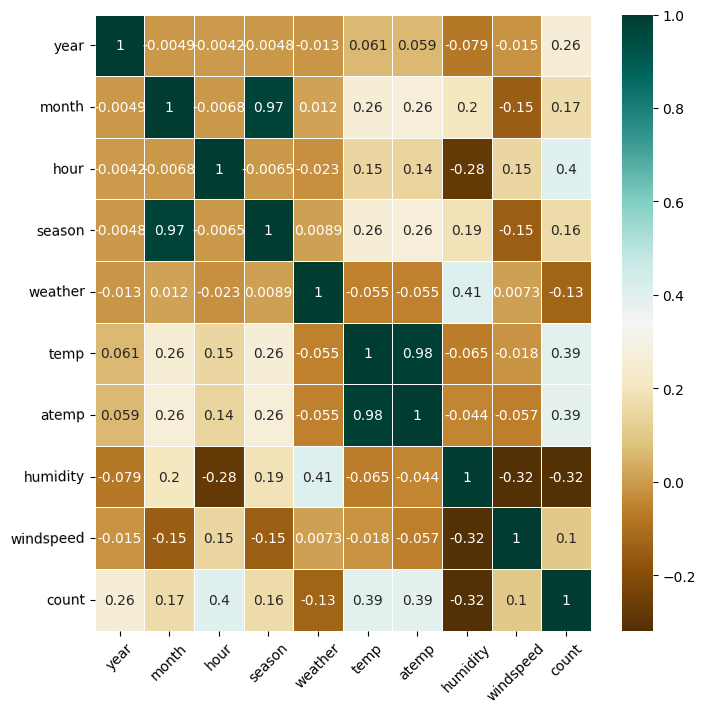

In [144]:
# 熱力圖，查看count與其他特徵間相關性大小

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8)) # 設定視窗尺寸

# 設定視窗尺寸data.corr()表示了data中的兩個變數之間的相關性，取值範圍為[-1,1],取值接近-1，表示反相關，類似反比例函數，取值接近1，表正相關。
sb.heatmap(train_Sel.corr(),cmap='BrBG',annot=True,linewidths=.5) # cmap:顏色 annot:格子裡面要不要填充值 linewidths:線條寬度

plt.xticks(fontsize=10,rotation=45) # 文字大小，旋轉角度
plt.yticks(fontsize=10,rotation=1)  # 文字大小，旋轉角度

In [145]:
# 把不是count的特徵拿出來
no_count_train_Sel = train_Sel.columns[train_Sel.columns != 'count']

# 在train_Sel中找到no_count_train_Sel的特徵
no_count_train_Sel = train_Sel[no_count_train_Sel]

# 得到沒有count的高相關度特徵
no_count_train_Sel

,year,month,hour,season,weather,temp,atemp,humidity,windspeed
0,2011,1,0,1,1,9.84,14.395,81,0.0000
1,2011,1,1,1,1,9.02,13.635,80,0.0000
2,2011,1,2,1,1,9.02,13.635,80,0.0000
3,2011,1,3,1,1,9.84,14.395,75,0.0000
4,2011,1,4,1,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,4,1,15.58,19.695,50,26.0027
10882,2012,12,20,4,1,14.76,17.425,57,15.0013
10883,2012,12,21,4,1,13.94,15.910,61,15.0013
10884,2012,12,22,4,1,13.94,17.425,61,6.0032


# 5.訓練模型

In [146]:
# 設定特徵data_x
data_x = no_count_train_Sel

# 檢查訓練集特徵值與目標值是否能對上
data_x.shape

(10886, 9)

In [147]:
# 設定目標值data_y
data_y = df_train['count']

# 檢查訓練集特徵值與目標值是否能對上
data_y.shape


(10886,)

In [148]:
# RMSE是常用於衡量模型預測值或估計量（樣本值或母體值）與觀測值之間差異的一種指標，越小差距越小就越好。
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [149]:
# 嘗試各種演算法，包括Logistic迴歸，決策樹，隨機森林，KNN和SVC。比較出更好的模型得分和模型rmse


# Logistic迴歸
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(data_x, data_y)

# 模型得分
model_Score = logreg.score(data_x, data_y)
print("Logreg Model Score %.2f" % model_Score)

# 模型rmse
data_x_predict_y=logreg.predict(data_x)
rmse_Score = rmse(data_y,data_x_predict_y)
print("Logreg Rmse Score %.2f" % rmse_Score)


# 決策樹
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(data_x, data_y)

# 模型得分
model_Score = dtree.score(data_x, data_y)
print("DTree Model Score %.2f" % model_Score)

# 模型rmse
data_x_predict_y=dtree.predict(data_x)
rmse_Score = rmse(data_y,data_x_predict_y)
print("DTree Rmse Score %.2f" % rmse_Score)


# 隨機森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(data_x, data_y)

# 模型得分
model_Score = rf.score(data_x, data_y)
print("Random Forest Model Score %.2f" % model_Score)

# 模型rmse
data_x_predict_y=rf.predict(data_x)
rmse_Score = rmse(data_y,data_x_predict_y)
print("Random Forest Rmse Score %.2f" % rmse_Score)



# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data_x, data_y)

# 模型得分
model_Score = knn.score(data_x, data_y)
print("Knn Model Score %.2f" % model_Score)

# 模型rmse
data_x_predict_y=knn.predict(data_x)
rmse_Score = rmse(data_y,data_x_predict_y)
print("knn Rmse Score %.2f" % rmse_Score)



# SVC
from sklearn.svm import SVC
svc = SVC()

svc.fit(data_x, data_y)

# 模型得分
model_Score = svc.score(data_x, data_y)
print("Svc Model Score %.2f" % model_Score)

# 模型rmse
data_x_predict_y=svc.predict(data_x)
rmse_Score = rmse(data_y,data_x_predict_y)
print("svc Rmse Score %.2f" % rmse_Score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logreg Model Score 0.02
Logreg Rmse Score 205.07
DTree Model Score 0.99
DTree Rmse Score 9.97
Random Forest Model Score 0.99
Random Forest Rmse Score 9.97
Knn Model Score 0.99
knn Rmse Score 9.97
Svc Model Score 0.02
svc Rmse Score 260.04


# 1.讀取資料

In [150]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_BikeSharingDemand/main/bike-sharing-demand/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [151]:
print('測試資料大小:',df_test.shape)

測試資料大小: (6493, 9)


In [152]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_test.info()

#初步資訊:沒有缺值真棒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# 2.數據清洗

In [153]:
# 因為casual(非註冊用戶租賃數量) + registered(註冊用戶租賃數量)	+ count(總租賃數量)
# 不過他的測試集本來就沒有casual(非註冊用戶租賃數量)和registered(註冊用戶租賃數量)和count(總租賃數量)

df_train

,year,month,day,hour,week,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,5,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011,1,1,2,5,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011,1,1,3,5,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011,1,1,4,5,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,2,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012,12,19,20,2,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012,12,19,21,2,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012,12,19,22,2,4,0,1,1,13.94,17.425,61,6.0032,129


# 3.特徵工程

In [154]:
# 把年月日時提取出來成為特徵

# 用.to_datetime將datetime(日期時間)欄位轉換為日期時間類型
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

# 插入年月日時
# .insert(插入位置，插入欄位名稱，插入值)
df_test.insert(1, 'year', df_test['datetime'].dt.year)
df_test.insert(2, 'month', df_test['datetime'].dt.month)
df_test.insert(3, 'day', df_test['datetime'].dt.day)
df_test.insert(4, 'hour', df_test['datetime'].dt.hour)


# 顯示結果
df_test.head()

,datetime,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,2011,1,20,0,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,2011,1,20,1,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,2011,1,20,2,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,2011,1,20,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,2011,1,20,4,1,0,1,1,10.66,12.880,56,11.0014


In [155]:
# 把星期幾也提取出來成為特徵

df_test.insert(5, 'week', df_test['datetime'].dt.weekday)

# 顯示結果
df_test.head()

,datetime,year,month,day,hour,week,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,2011,1,20,0,3,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,2011,1,20,1,3,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,2011,1,20,2,3,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,2011,1,20,3,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,2011,1,20,4,3,1,0,1,1,10.66,12.880,56,11.0014


In [156]:
# datetime已經被拆分了，所以他就可以刪了(另一方面時間的格式會在有些訓練模型上出現錯誤)
df_test = df_test.drop(['datetime'],axis=1)

df_test

,year,month,day,hour,week,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,20,0,3,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,20,1,3,1,0,1,1,10.66,13.635,56,0.0000
2,2011,1,20,2,3,1,0,1,1,10.66,13.635,56,0.0000
3,2011,1,20,3,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,1,20,4,3,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012,12,31,19,0,1,0,1,2,10.66,12.880,60,11.0014
6489,2012,12,31,20,0,1,0,1,2,10.66,12.880,60,11.0014
6490,2012,12,31,21,0,1,0,1,1,10.66,12.880,60,11.0014
6491,2012,12,31,22,0,1,0,1,1,10.66,13.635,56,8.9981


# 4.相關性分析

In [157]:
# 取得高相關性的特徵資料

# 刪除train_Sel_columns中的count(這裡拿取訓練集選中的特徵行)
# 把剩下的特徵行提取成一個Dataform
no_count_test_Sel = df_test[train_Sel_columns.drop('count')]

# 取得高相關性的特徵資料
no_count_test_Sel

,year,month,hour,season,weather,temp,atemp,humidity,windspeed
0,2011,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,1,1,1,10.66,13.635,56,0.0000
2,2011,1,2,1,1,10.66,13.635,56,0.0000
3,2011,1,3,1,1,10.66,12.880,56,11.0014
4,2011,1,4,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012,12,19,1,2,10.66,12.880,60,11.0014
6489,2012,12,20,1,2,10.66,12.880,60,11.0014
6490,2012,12,21,1,1,10.66,12.880,60,11.0014
6491,2012,12,22,1,1,10.66,13.635,56,8.9981


# 5.訓練模型

In [158]:
# 設定特徵資料為data_x
test_data_x = no_count_test_Sel

# 檢查測試集特徵值與訓練集特徵值是否能對上
test_data_x.shape

(6493, 9)

In [159]:
# Random Forest

# rf開始預測
test_rf_y=rf.predict(test_data_x)

# 由於刪除了時間欄位，所以再次載入資料取得時間

df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_BikeSharingDemand/main/bike-sharing-demand/test.csv'

df_test = pd.read_csv(df_test_url)


# 導出預測結果
test_rfDf=pd.DataFrame()
test_rfDf['datetime']=df_test['datetime']
test_rfDf['count']=test_rf_y

# 顯示預測結果
test_rfDf

,datetime,count
0,2011-01-20 00:00:00,5
1,2011-01-20 01:00:00,23
2,2011-01-20 02:00:00,16
3,2011-01-20 03:00:00,1
4,2011-01-20 04:00:00,1
...,...,...
6488,2012-12-31 19:00:00,373
6489,2012-12-31 20:00:00,227
6490,2012-12-31 21:00:00,373
6491,2012-12-31 22:00:00,106


In [160]:
# 將預測結果導出為csv文件
test_rfDf.to_csv('./BikeSharingDemand_rf.csv',index=False)